In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc
import pandas as pd
import os


In [4]:
# %pip install biopython

import Bio
from Bio.SeqUtils import GC
from Bio.Data import CodonTable
from Bio import Entrez
from Bio import SeqIO
from Bio import pairwise2 as pw
from Bio import AlignIO
from Bio import Align as al
EMAIL = 's1905547@ed.ac.uk'
Entrez.email = EMAIL

string_mcl_file ="string_MCL_clusters.tsv"


## Task 1

#### String DB Network Stats
number of nodes:	211
number of edges:	1520
average node degree:	14.4


## Task 2

In [5]:
mcl_complete = pd.read_csv(string_mcl_file, sep='\t', header=0)
mcl_complete.head()




,#clustering method,cluster number,cluster color,gene count,protein name,protein identifier,protein description
0,MCL,1,Red,32,ARX,9606.ENSP00000368332,Homeobox protein ARX; Transcription factor req...
1,MCL,1,Red,32,CASK,9606.ENSP00000367408,Peripheral plasma membrane protein CASK; Multi...
2,MCL,1,Red,32,DLG4,9606.ENSP00000382428,Disks large homolog 4; Interacts with the cyto...
3,MCL,1,Red,32,DPYSL2,9606.ENSP00000309539,Dihydropyrimidinase-related protein 2; Plays a...
4,MCL,1,Red,32,DSCAM,9606.ENSP00000383303,Down syndrome cell adhesion molecule; Cell adh...


#### Find the two largest MCL clusters

In [6]:
cluster_number_two_largest = mcl_complete.groupby("cluster number"
                                        ,as_index=False)["gene count"].count()["cluster number"].sort_values().head(2).values


In [7]:
for i in range(2):
    mcl_complete.loc[mcl_complete["cluster number"] == cluster_number_two_largest[i] ]["protein name"].to_csv('protein_list/protein_cl_{}.txt'.format(i+1),index=False,header=False)

In [8]:
def pantherPlot(filename,wrap=40):
    f = pd.read_csv(filename,delimiter="	",header=None)
    f.columns = ['Number','Label','Count','Percentage','Remainder']
    f['Label'] = f['Label'].str.capitalize()
    f['Label'] = f['Label'].str.wrap(wrap)
    f['Percentage'] =(f['Percentage'].str.replace("%","")).astype(float)
    
    p = f.sort_values(['Count'],ascending=False)[:10].plot(x='Label',y='Percentage',figsize=(10,5),kind='barh',color='black',fontsize=11,legend=False)
    p.bar_label(p.containers[0],label_type='center',fontsize=11,color='white')

    p.set_ylabel('Gene Ontology',fontsize=11)
    p.set_xlabel('Gene Percentage(%)',fontsize=11)
    plt.tight_layout()

    plt.show()
    

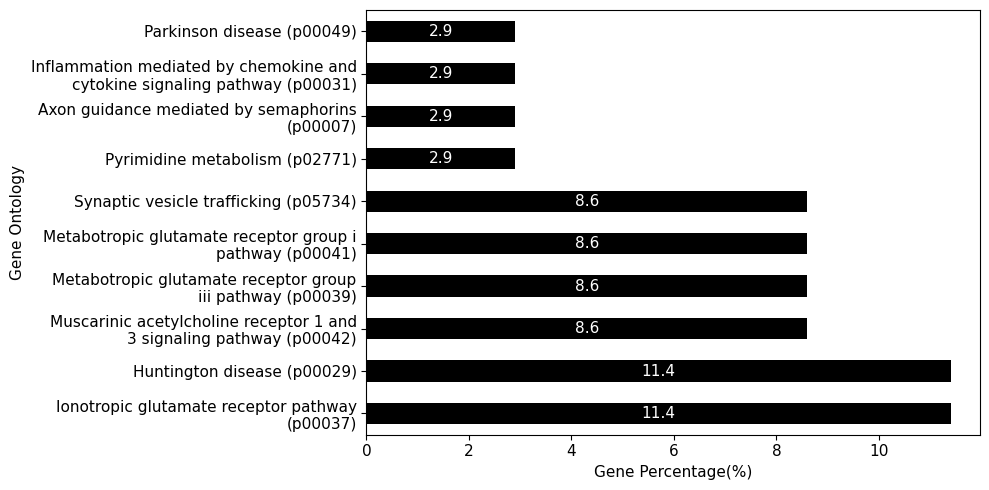

In [9]:
pantherPlot('panther_task3/pantherChart_1.txt')

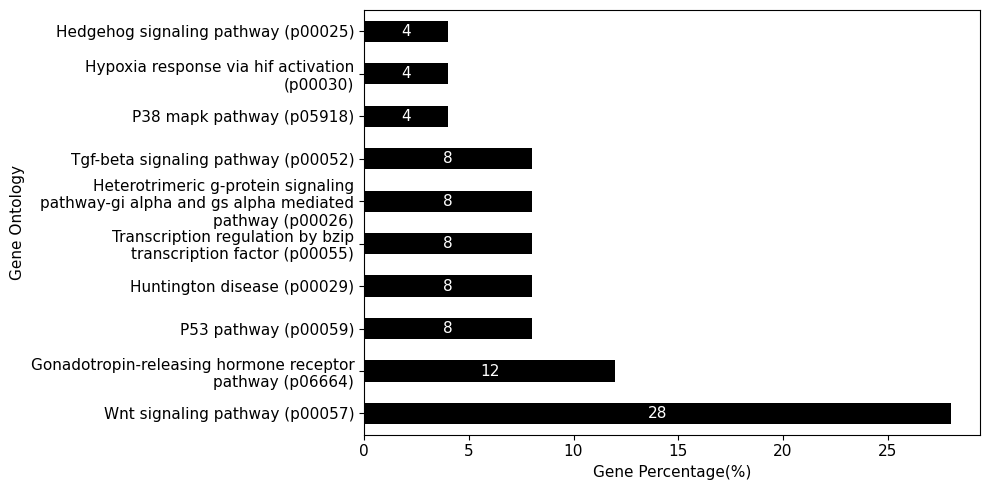

In [10]:
pantherPlot('panther_task3/pantherChart_2.txt')

## Task 3

![alt text](string_normal_image.png "Title")

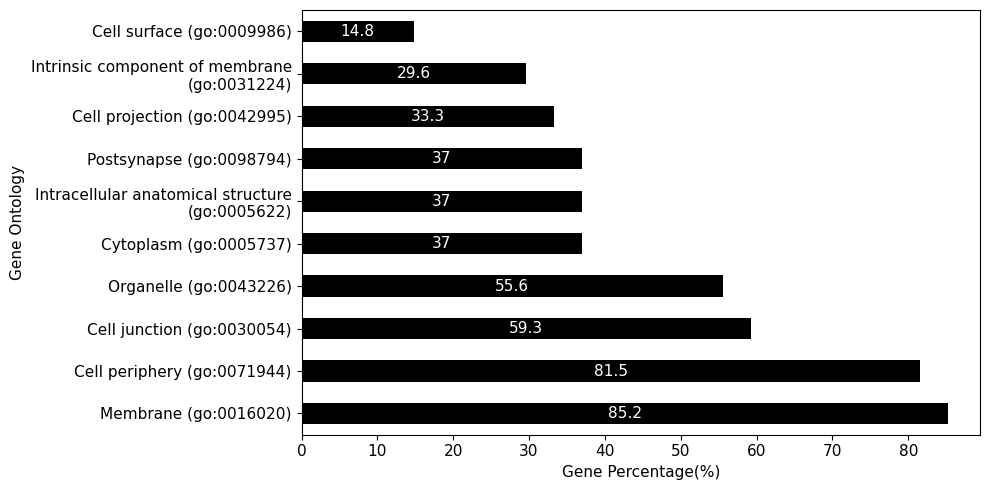

In [11]:
pantherPlot('pantherChart_cellularAnatomicalnetity.txt')

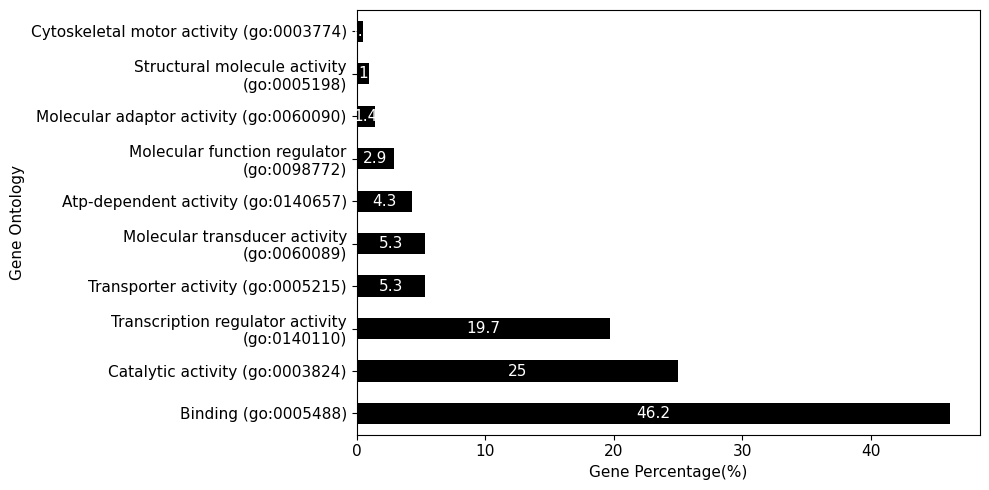

In [12]:
pantherPlot('pantherMolecular Function_1.txt')

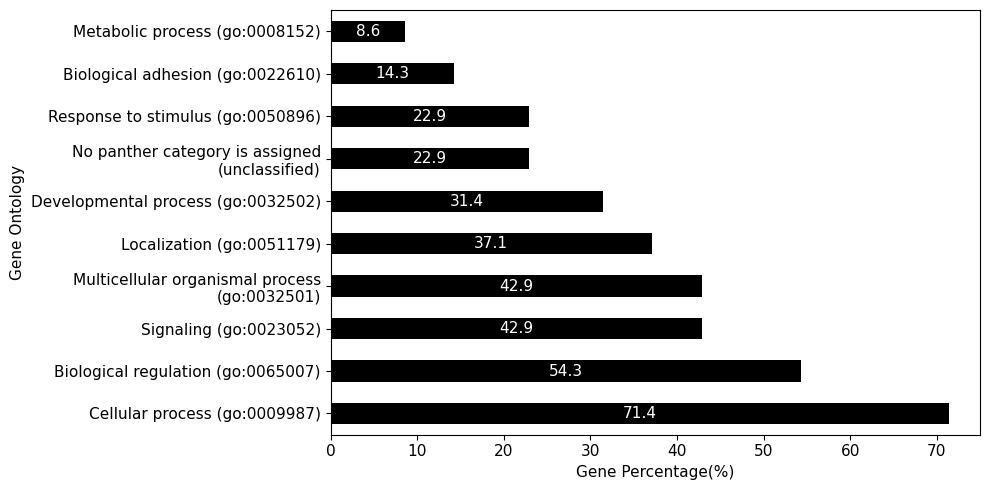

In [13]:
pantherPlot('pantherChart_bp.txt')